In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Laptops.csv")
df.head()

,Unnamed: 0,Brand,Model Name,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,0,HP,15s-fq5007TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹38,990"
1,1,HP,15s-fy5003TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹37,990"
2,2,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
3,3,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
4,4,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        837 non-null    int64 
 1   Brand             837 non-null    object
 2   Model Name        837 non-null    object
 3   Processor         837 non-null    object
 4   Operating System  837 non-null    object
 5   Storage           825 non-null    object
 6   RAM               837 non-null    object
 7   Screen Size       837 non-null    object
 8   Touch_Screen      837 non-null    object
 9   Price             837 non-null    object
dtypes: int64(1), object(9)
memory usage: 65.5+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Unnamed: 0           0
Brand                0
Model Name           0
Processor            0
Operating System     0
Storage             12
RAM                  0
Screen Size          0
Touch_Screen         0
Price                0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.shape

(825, 10)

In [7]:
df.drop(columns='Unnamed: 0',inplace=True)

In [8]:
df['Operating System'].value_counts()

Windows 11 Home    747
Windows 10 Home     27
Chrome              13
Windows 10          10
DOS                  7
Mac OS Monterey      5
Windows 11 Pro       5
Mac OS Big Sur       3
Windows 10 Pro       3
Prime OS             1
Ubuntu               1
macOS Ventura        1
macOS Sonoma         1
Mac OS Mojave        1
Name: Operating System, dtype: int64

In [9]:
def os(data):
    if 'windows' in data.lower():
        return "Windows"
    elif 'mac' in data.lower():
        return "Mac"
    else:
        return "Others"

df['Operating System'] = df['Operating System'].apply(os)


In [10]:
df["Processor"] = df['Processor'].apply(lambda x:" ".join(x.split()[0:2]))

In [11]:
df['Processor'].value_counts()

Core i5              361
Core i3              159
Ryzen 5               94
Core i7               68
Ryzen 7               68
Ryzen 3               20
Celeron Dual          15
Celeron Quad          10
Pentium Silver         4
Core i9                4
Ryzen 9                3
Athlon Dual            3
MediaTek Kompanio      3
M1                     3
M2                     3
Ryzen Z1               2
MediaTek MT8788        1
M1 Max                 1
M2 Max                 1
M3 Pro                 1
M1 Pro                 1
Name: Processor, dtype: int64

In [12]:
def processor(text):
    if "Celeron" in text:
        return "Celeron"
    elif "Core" in text:
        if "9" in text:
            return "Others"
        else:
            return text
    elif "Ryzen" in text:
        if any(m in text for m in ['Z1', "9"]):
            return "Others"
        else:
            return text
    elif any(m in text for m in ["M1", "M2", "M3"]):
        return "Mac"
    else:
        return "Others"

df["Processor"] = df['Processor'].apply(processor)

In [13]:
df.Processor.value_counts()

Core i5    361
Core i3    159
Ryzen 5     94
Core i7     68
Ryzen 7     68
Celeron     25
Ryzen 3     20
Others      20
Mac         10
Name: Processor, dtype: int64

In [14]:
df['Storage'] = df['Storage'].str.replace("GB","")
df['Storage'] = df['Storage'].str.replace("TB","000")
df['Storage'] = df['Storage'].str.replace(" ","")
df.sample(5)

,Brand,Model Name,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
135,HP,14-dv2014TU,Core i5,Windows,512,16 GB,35.56 cm (14 inch),No,"₹63,999"
74,Lenovo,15ACH6,Ryzen 5,Windows,512,8 GB,100.63 cm (39.62 cm),No,"₹45,990"
56,HP,14-dv2153TU,Core i5,Windows,1000,16 GB,35.56 cm (14 inch),No,"₹66,999"
602,HP,15s-fy5003TU,Core i3,Windows,512,8 GB,39.62 cm (15.6 Inch),No,"₹37,990"
410,HP,15s- fr5011TU,Core i5,Windows,512,16 GB,39.62 cm (15.6 inch),No,"₹53,990"


In [15]:
df['RAM'] = df['RAM'].str.replace("GB","")
df.sample(5)

,Brand,Model Name,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
521,Acer,Aspire 5 Gaming,Core i5,Windows,512,8,39.62 cm (15.6 inch),No,"₹54,990"
460,HP,15s-fy5003TU,Core i3,Windows,512,8,39.62 cm (15.6 Inch),No,"₹37,990"
624,ASUS,Pro 15 OLED,Ryzen 7,Windows,512,16,39.62 cm (15.6 inch),Yes,"₹74,990"
822,HP,15s,Ryzen 5,Windows,512,8,39.62 cm (15.6 inch),No,"₹24,831"
752,ASUS,B9450FA-BM0696R,Core i7,Windows,1000,16,35.56 cm (14 inch),No,"₹1,52,711"


In [16]:
df['Screen Size'].value_counts()

39.62 cm (15.6 Inch)     363
39.62 cm (15.6 inch)     184
35.56 cm (14 inch)       124
35.56 cm (14 Inch)        49
40.64 cm (16 Inch)        19
33.78 cm (13.3 inch)      10
40.64 cm (16 inch)         8
40.89 cm (16.1 Inch)       7
43.94 cm (17.3 Inch)       6
33.78 cm (13.3 Inch)       6
96.52 cm (38 cm)           6
38.1 cm (15 inch)          4
35.81 cm (14.1 inch)       3
40.89 cm (16.1 inch)       3
39.01 cm (15.36 inch)      3
34.29 cm (13.5 inch)       3
35.81 cm (14.1 Inch)       2
33.02 cm (13 inch)         2
100.63 cm (39.62 cm)       2
17.78 cm (7 Inch)          2
43.94 cm (17.3 inch)       2
34.29 cm (13.5 Inch)       2
38.86 cm (15.3 Inch)       1
31.5 cm (12.4 Inch)        1
36.07 cm (14.2 inch)       1
38.0 cm (14.96 cm)         1
90.32 cm (35.56 cm)        1
30.48 cm (12 inch)         1
29.46 cm (11.6 Inch)       1
41.15 cm (16.2 inch)       1
34.04 cm (13.4 inch)       1
35.0 cm (13.78 inch)       1
34.04 cm (13.4 Inch)       1
26.67 cm (10.5 inch)       1
38.0 cm (14.96

In [17]:
df['Screen Size'] = df['Screen Size'].apply(lambda x:"".join(x.split(" ")[0]))

In [18]:
df.Price = df.Price.str.replace("₹","")
df.Price = df.Price.str.replace(",","")
df.sample(5)

,Brand,Model Name,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
442,ASUS,K3405ZF-LY542WS,Core i5,Windows,512,16,35.56,No,64990
463,HP,15s- fr5011TU,Core i5,Windows,512,16,39.62,No,53990
607,ASUS,K3605ZC-MBN752WS,Core i7,Windows,1000,16,40.64,No,87990
120,Apple,MacBook Air,Mac,Mac,256,8,34.54,No,104990
617,DELL,Latitude 14,Core i7,Windows,512,16,35.56,No,99990


In [19]:
df[['Storage','RAM','Price']] = df[['Storage','RAM','Price']].astype(int)

In [20]:
df["Screen Size"] = df['Screen Size'].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 836
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             825 non-null    object 
 1   Model Name        825 non-null    object 
 2   Processor         825 non-null    object 
 3   Operating System  825 non-null    object 
 4   Storage           825 non-null    int32  
 5   RAM               825 non-null    int32  
 6   Screen Size       825 non-null    float64
 7   Touch_Screen      825 non-null    object 
 8   Price             825 non-null    int32  
dtypes: float64(1), int32(3), object(5)
memory usage: 54.8+ KB


In [22]:
df.drop(columns="Model Name",inplace=True)

In [23]:
df.sample()

,Brand,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
360,Lenovo,Ryzen 3,Windows,512,8,39.62,No,33999


<Axes: >

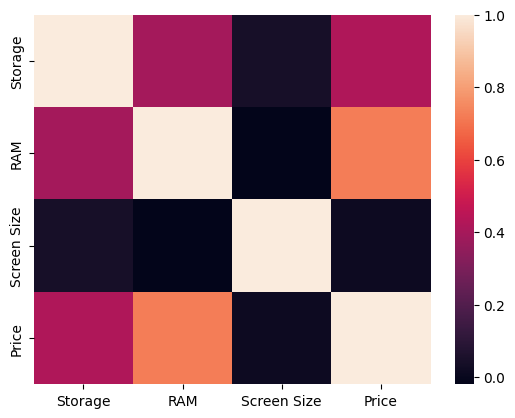

In [24]:
sns.heatmap(df.corr(numeric_only=True))

C:\Users\abdul\AppData\Local\Temp\ipykernel_11732\824416946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


<Axes: xlabel='Price', ylabel='Density'>

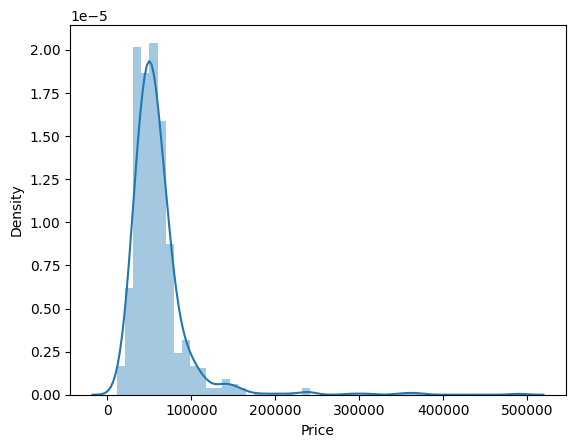

In [25]:
sns.distplot(df.Price)

<Axes: >

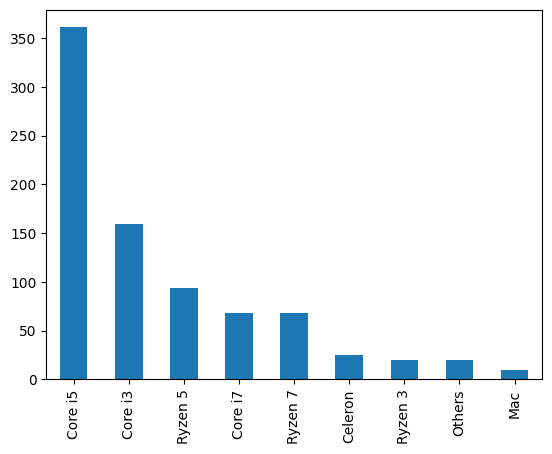

In [26]:
df['Processor'].value_counts().plot(kind = 'bar')

In [27]:
df['Brand'].value_counts()

HP           423
ASUS         142
DELL          59
Lenovo        55
Acer          36
MSI           32
Infinix       29
Apple         11
SAMSUNG        9
CHUWI          7
GIGABYTE       5
WINGS          4
ZEBRONICS      4
MICROSOFT      3
Ultimus        2
LG             2
realme         1
Primebook      1
Name: Brand, dtype: int64

In [28]:
rare_b = ['SAMSUNG','GIGABYTE','CHUWI','WINGS','ZEBRONICS','Ultimus','LG','realme','Primebook','MICROSOFT']
df.Brand = df.Brand.apply(lambda x: "Others" if x in rare_b else x)

<Axes: >

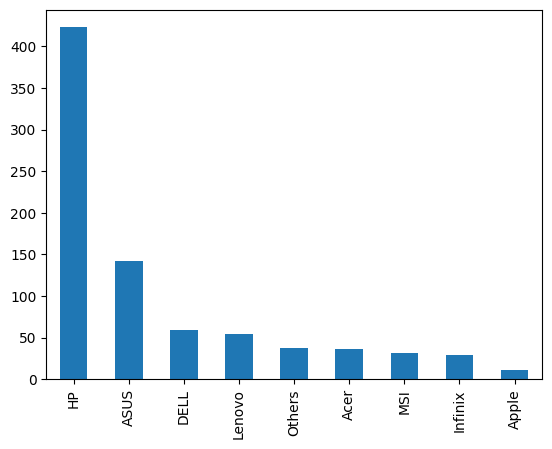

In [29]:
df['Brand'].value_counts().plot(kind = 'bar')

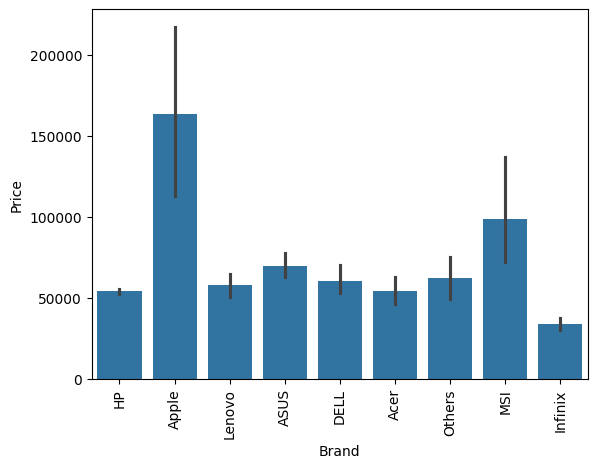

In [30]:
sns.barplot(x=df.Brand,y=df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

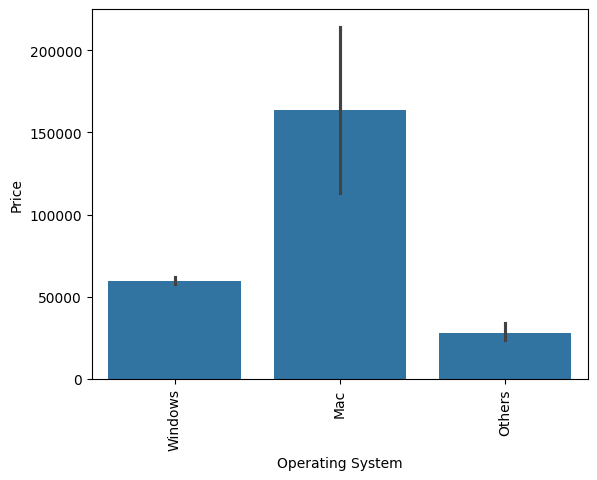

In [31]:
sns.barplot(x=df['Operating System'],y=df.Price)
plt.xticks(rotation = "vertical")
plt.show()

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

C:\Users\abdul\AppData\Local\Temp\ipykernel_11732\3309387210.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<Axes: xlabel='Price', ylabel='Density'>

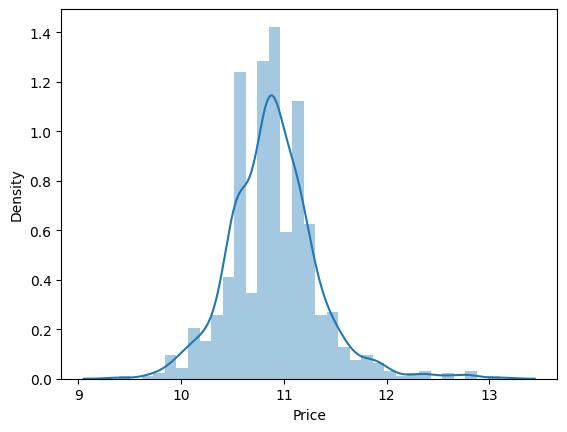

In [33]:
X= df.drop(columns="Price")
Y = np.log(df['Price'])
sns.distplot(Y)

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=83)

In [35]:
X_train

,Brand,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen
24,HP,Core i3,Windows,512,8,39.62,No
435,HP,Core i3,Windows,512,8,39.62,No
559,DELL,Core i7,Windows,512,16,34.04,Yes
380,HP,Core i5,Windows,512,16,39.62,No
466,HP,Core i3,Windows,512,8,39.62,No
...,...,...,...,...,...,...,...
833,DELL,Core i3,Windows,1000,8,35.56,Yes
263,Infinix,Core i5,Windows,512,16,39.62,No
819,HP,Core i5,Windows,512,8,39.62,No
545,HP,Core i3,Windows,512,8,39.62,No


In [36]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,1,2,6])
],remainder='passthrough')
step_2  = LinearRegression()
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.7634769123172199
MAE 0.14500909939243598


In [37]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown="ignore"),[0,1,2,6])
],remainder='passthrough')
step_2  = RandomForestRegressor()
pipe_rf = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe_rf.fit(X_train,Y_train)
y_pred = pipe_rf.predict(X_test)

print('Random Forest: R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.7438792224106039
MAE 0.14016726713708574


In [38]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,1,2,6])
],remainder='passthrough')
step_2  = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.6892977228137436
MAE 0.17038053656080768


In [39]:
from sklearn.tree import DecisionTreeRegressor
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,1,2,6])
],remainder='passthrough')
step_2  = DecisionTreeRegressor()
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.7041671966983091
MAE 0.14673482022901937


In [40]:
from xgboost import XGBRegressor
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,1,2,6])
],remainder='passthrough')
step_2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('xgbboost R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.7650427928827509
MAE 0.12368078422396044


In [ ]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='infrequent_if_exist'),[0,1,2,6])
],remainder='passthrough')
step_2 = GradientBoostingRegressor(n_estimators=500,max_depth=15,max_features=0.75,)
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('Gradient Boost: R2 score',r2_score(Y_test,y_pred))

# print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.7762794703786464
MAE 0.12301810076788297


In [42]:
def best_rs(X,Y):
    r2_score_ =[]
    try:
        for i in range(1,100):
            X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
            pipe_rf.fit(X_train,Y_train)
            y_pred = pipe_rf.predict(X_test)
            r2_score_.append(r2_score(Y_test,y_pred))
        return r2_score_
    except ValueError as e:
        print("error")

In [43]:
import warnings
warnings.simplefilter("ignore") 

In [44]:
result = best_rs(X,Y)
print(np.argmax(result))

83


In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=84)
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown="ignore"),[0,1,2,6])
],remainder='passthrough')
step_2  = RandomForestRegressor()
pipe_rf = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe_rf.fit(X_train,Y_train)
y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8677354667923868
MAE 0.10734806412687181


In [46]:
np.random.seed(42)
from sklearn.model_selection import GridSearchCV
param_dist = {'step2__n_estimators': [50,100,150,200,500],
              'step2__max_depth': [2, 3, 4, 8, 15,None],
              
              'step2__max_samples': [0.5, 0.75, 1.0],
              'step2__max_features': ['sqrt', 'log2', None],
              'step2__criterion': ["squared_error", "absolute_error"]}

cv_rf = GridSearchCV(estimator=pipe_rf, 
                     cv = 5,
                     param_grid=param_dist,
                     n_jobs = -1)

cv_rf.fit(X,Y)

print('Best Parameters using grid search: \n',
      cv_rf.best_params_)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=84)
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='infrequent_if_exist'),[0,1,2,6])
],remainder='passthrough')
step_2  = RandomForestRegressor(n_estimators=500,
                                max_samples=1.0,
                                max_features='log2',
                                max_depth=15,
                                criterion='squared_error'
)
pipe_rf = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe_rf.fit(X_train,Y_train)
y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


In [ ]:
query = np.array(['Apple','Mac','Mac',256,8,39.23,'No'])

query = query.reshape(1,7)
np.exp(pipe_rf.predict(query))

In [ ]:
import pickle
with open('laptop_price_model.pkl', 'wb') as f:
    pickle.dump(pipe_rf, f)